In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustering.kmesar import *
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [2]:
points = np.array([[1, 2], [3, 3], [0, 1]])
print(np.mean(points, axis=0))

[1.33333333 2.        ]


[0. 0. 1. 1. 0. 0. 1. 2. 2. 2. 2. 2.]
1.019803902718557
0.8


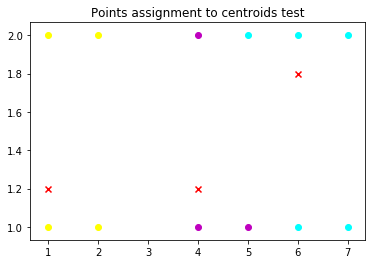

In [3]:
centroids = np.array([
    [1, 1.2],
    [4, 1.2],
    [6, 1.8]
])
points = np.array([[1, 1], [2, 1], [4, 1], [5, 1], [1, 2], [2, 2], [4, 2], [5, 2],
                   [6, 1], [7, 1], [6, 2], [7, 2]])

labels = assign_points_to_centroids(points, centroids)
print(labels)

colors = ['yellow', 'm', 'cyan', 'brown']
for k in range(np.unique(labels).shape[0]):
    points_k = extract_labeled_points(points, labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('Points assignment to centroids test')
plt.show()

print(euclidean_distance(np.array([4, 2]), np.array([5, 1.8])))
print(euclidean_distance(np.array([4, 2]), np.array([4, 1.2])))

[[1.5        1.5       ]
 [4.33333333 1.33333333]
 [6.2        1.6       ]]


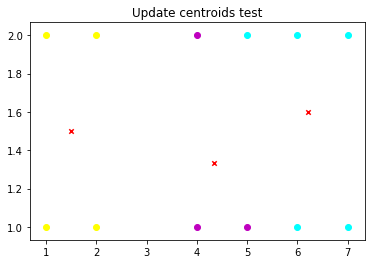

In [4]:

for k in range(np.unique(labels).shape[0]):
    points_k = extract_labeled_points(points, labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

new_centroids = update_centroids(points, centroids, labels)
print(new_centroids)

plt.title('Update centroids test')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', s=20, marker='x')

In [5]:
sse = sum_of_squared_error(points, new_centroids, labels)
print(f'SSE = {sse}')

SSE = 7.333333333333334


In [6]:
sse_test_0 = euclidean_distance(points[0], new_centroids[0])**2 + \
           euclidean_distance(points[1], new_centroids[0])**2 + \
           euclidean_distance(points[4], new_centroids[0])**2 + \
           euclidean_distance(points[5], new_centroids[0])**2
print(f'SSE_test_0 = {sse_test_0}')
print(new_centroids[0])
print(points[0])
print(points[1])
print(points[4])
print(points[5])

print(f'SSE_test = {sse_test_0 * 3}')

SSE_test_0 = 2.0000000000000004
[1.5 1.5]
[1 1]
[2 1]
[1 2]
[2 2]
SSE_test = 6.000000000000002


In [7]:
p = np.sum(np.power(points[0] - new_centroids[0], 2))
print(p)

p2 = euclidean_distance(points[0], new_centroids[0]) ** 2
print(p2)

0.5
0.5000000000000001


In [8]:
lower_bound = np.array([-1, -5, 0, 0.5, 0.9])
upper_bound = np.array([1, 1.5, 2, 0.6, 3])
x = np.random.random_sample((5,))
print(x)

x_lower_upper = lower_bound + x * (upper_bound - lower_bound)
print(x_lower_upper)

[0.55298334 0.27716848 0.48215362 0.62232714 0.32045338]
[ 0.10596668 -3.19840487  0.96430723  0.56223271  1.57295211]


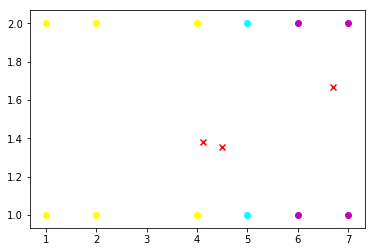

In [9]:
# print(points)
mins = np.min(points, axis=0)
maxs = np.max(points, axis=0)

init_centroids = initialize_centroids_random(points, 3, lower_bound=mins, upper_bound=maxs)
init_labels = assign_points_to_centroids(points, init_centroids)
k_labels = init_centroids.shape[0]

for k in range(k_labels):
    points_k = extract_labeled_points(points, init_labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='red', marker='x')

In [10]:
print(init_labels)

[0. 0. 0. 2. 0. 0. 0. 2. 1. 1. 1. 1.]


In [11]:
a = np.array([1, 2])
a = np.append(a, 3)
print(a)

[1 2 3]


In [12]:
mean_centroids = np.array([
    [1, 2], [3, 1], [4, 4]
])
annealed_centroids = np.array([
    [1.5, 2.5], [3, 1], [2, 2]
])

history = np.concatenate([mean_centroids, annealed_centroids], axis=1)
print(history)

indices = np.array([0, 2])
print(mean_centroids[indices])

[[1.  2.  1.5 2.5]
 [3.  1.  3.  1. ]
 [4.  4.  2.  2. ]]
[[1 2]
 [4 4]]


In [13]:
l = mean_centroids.shape[0]
n = mean_centroids.shape[1]
concat = np.zeros((l, 2, n))
concat[:, 0, :] = mean_centroids
concat[:, 1, :] = annealed_centroids

print(concat)

[[[1.  2. ]
  [1.5 2.5]]

 [[3.  1. ]
  [3.  1. ]]

 [[4.  4. ]
  [2.  2. ]]]


In [14]:
a = np.array([0, 1, 2, 3, 4, 5, 2, 2, 2])
a_new = np.delete(a, np.where(a == 2))

In [15]:
pts = np.array([[1, 2], [0, 0], [3, 3], [4, 1], [5, 6]])
pts_mean = np.mean(pts, axis=0)
print(pts_mean)

[2.6 2.4]


In [16]:
x = np.array([1, 2])
print(x.shape)
print(x.shape[0])
print(type(x) == np.ndarray)
x.ndim

(2,)
2
True


1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


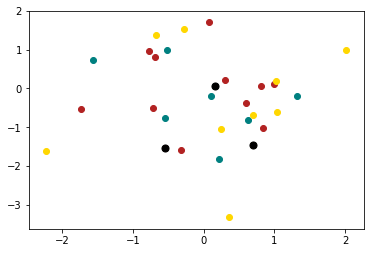

In [17]:
points = np.random.randn(30, 2)
l1 = np.zeros((12,))
l2 = np.zeros((8,)) + 1
l3 = np.zeros((10,)) + 2
labels = np.concatenate([l1, l2, l3])

print(labels)

K = np.unique(labels).shape[0]
colors = ['firebrick', 'teal', 'gold']
for k in range(K):
    subsample = points[np.where(labels == k)]
    plt.scatter(subsample[:, 0], subsample[:, 1], c=colors[k])

rand_points = get_random_points_from_clusters(points, labels)
plt.scatter(rand_points[:, 0], rand_points[:, 1], c='black', s=50)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


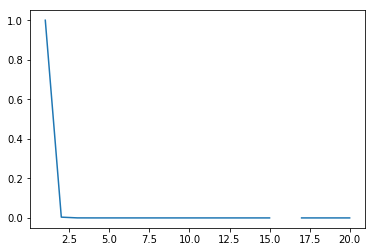

In [18]:
x = np.arange(1, 21)
y = 1 / (x ** 8)
plt.plot(x, y)

In [19]:
pts_j = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
centroid_j = np.array([0.5, 0.5])
sses = la.norm(centroid_j - pts_j, ord=2, axis=1)
sse_single = np.sum(sses)

print(sses)
print(sse_single)

[0.70710678 0.70710678 0.70710678 0.70710678]
2.8284271247461903


In [20]:
points = np.array([[1, 1], [2, 2.5], [3, 0], [-1, -1], [2, 2], [0, 0.5], [3, 3], [4, 0], [2, -1.5]])
centroids = np.array([[1, 2], [0.5, 0.5], [1, -1]])
distances = []

for point in points:
    point_distances = la.norm(point - centroids, ord=2, axis=1)

    distances.append(np.max(point_distances))

print(distances)

[2.0, 3.640054944640259, 2.8284271247461903, 3.605551275463989, 3.1622776601683795, 1.8027756377319946, 4.47213595499958, 3.605551275463989, 3.640054944640259]


In [21]:
max_distances = get_max_distances(points, centroids)
print(max_distances)

[2.         3.64005494 2.82842712 3.60555128 3.16227766 1.80277564
 4.47213595 3.60555128 3.64005494]


In [22]:
furthest_point = get_furthest_point(points, centroids)
print(furthest_point)

[4. 0.]


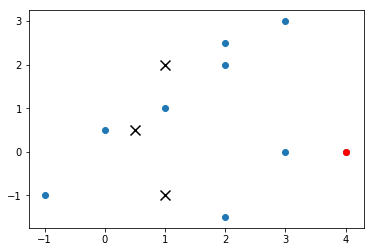

In [23]:
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='x')
plt.scatter(furthest_point[0], furthest_point[1], c='red')

In [24]:
n_iter = int(round(13 / 10))
print(n_iter)

1


In [25]:
iters = np.arange(1, 13 + 1, 2)
iters_len = iters.shape[0]

n_rows = iters_len // 2 + 1

print(iters)
print(f'iters_len = {iters_len}')
print(f'n_rows = {n_rows}')

[ 1  3  5  7  9 11 13]
iters_len = 7
n_rows = 4


In [26]:
iters = np.arange(1, 12 + 1, 2)
iters = np.append(iters, 12)
iters_len = iters.shape[0]

n_rows = iters_len // 2 + 1

print(iters)
print(f'iters_len = {iters_len}')
print(f'n_rows = {n_rows}')

[ 1  3  5  7  9 11 12]
iters_len = 7
n_rows = 4


In [27]:
n_iter = 99
iters = np.arange(1, 99 + 1, 5)
n_iter_mod = 99 % 5
iters = np.append(iters, n_iter) if n_iter_mod != 0 else iters
iters_len = iters.shape[0]

n_rows = iters_len // 2 + 1

print(iters)
print(f'n_iter_mod = {n_iter_mod}')
print(f'iters_len = {iters_len}')
print(f'n_rows = {n_rows}')

[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96 99]
n_iter_mod = 4
iters_len = 21
n_rows = 11


In [36]:
n_iter = 300
iters = np.arange(1, 300 + 1, 10)
n_iter_mod = 300 % 10
iters = np.append(iters, n_iter) if iters[-1] != n_iter else iters
iters_len = iters.shape[0]

n_rows = iters_len // 2 + 1

print(iters)
print(f'n_iter_mod = {n_iter_mod}')
print(f'iters_len = {iters_len}')
print(f'n_rows = {n_rows}')

[  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201 211 221 231 241 251 261 271 281 291 300]
n_iter_mod = 0
iters_len = 31
n_rows = 16


In [29]:
scaler = MinMaxScaler()
centroids = np.array([[2, 2], [3, 3], [-1.2, 0.5], [-2, -3], [4, 6], [0, 1.6]])
scaled_centroids = scaler.fit_transform(centroids)

print(scaled_centroids)
print(scaler.inverse_transform(scaled_centroids))

[[0.66666667 0.55555556]
 [0.83333333 0.66666667]
 [0.13333333 0.38888889]
 [0.         0.        ]
 [1.         1.        ]
 [0.33333333 0.51111111]]
[[ 2.   2. ]
 [ 3.   3. ]
 [-1.2  0.5]
 [-2.  -3. ]
 [ 4.   6. ]
 [ 0.   1.6]]


In [33]:
type_str = str(type(scaler))
dot_index = type_str.rindex('.')
print(type_str[dot_index + 1 :-2])

MinMaxScaler
